In [2]:
import scipy
from matplotlib import pyplot as plt

class IsingSimulation:

    J = 6.34369e-21  # Interaction constant for iron [Joule]
    kB = 1.38065e-23  # Boltzmann constant [Joule / Kelvin]

    def __init__(self, size, temperature=300):
        '''
        Create a new Ising model simulation. The state is initialized
        randomly.

        Arguments:

            size (int) The number of cells along each dimension of the
              square grid.

            temperature (float) The temperature in Kelvin at which to
              run the simulation. The Curie temperature for iron is
              1043 K. Room temperature is about 300 K. Default: 300.
        '''
        self.size = size
        self.temperature = temperature
        self.state = scipy.random.choice(
            [-1, +1], size=(self.size, self.size))
        self.step = 0

    def set_temperature(self, temp):
        '''
        Set the temperature of the model in Kelvin.
        '''
        self.temperature = float(temp)

    def energy(self):
        '''
        Compute the energy of the current state of the model.
        '''
        return -self.J * (self.state * (
            scipy.roll(self.state, 1, axis=0) +
            scipy.roll(self.state, 1, axis=1))).sum()

    def average_magnetism(self):
        '''
        Compute the average per-cell magnetism of the current state
        of the model.
        '''
        return self.state.mean()

    def update(self):
        '''
        Do a single cell update of the model state.
        '''
        # Pick a random cell to flip
        i, j = scipy.random.randint(self.size, size=2)

        # Change in energy from current state to next state
        delta_E = 2 * self.J * self.state[i,j] * (
            self.state[(i + 1) % self.size, j] +
            self.state[(i - 1) % self.size, j] +
            self.state[i, (j + 1) % self.size] +
            self.state[i, (j - 1) % self.size])

        # Log probability of changing state
        log_p = -delta_E / (self.temperature * self.kB)
        if scipy.log(scipy.random.uniform(0, 1)) < log_p:
            self.state[i,j] = -self.state[i,j]

        self.step += 1

    def display(self):
        '''
        Plot the state of the model.
        '''
        plt.figure()
        plt.imshow(self.state, vmin=-1, vmax=+1)
        plt.title('Step: ' + str(self.step) + ', M = ' + str(self.average_magnetism()))

/Users/claudia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead


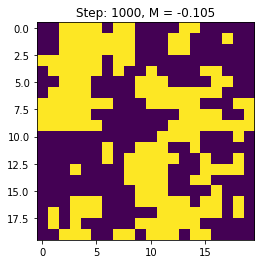

In [6]:
size = 20
sim = IsingSimulation(size, temperature=1043)  # Ising model at the Curie temperature
for _ in range(1000):
    sim.update()
sim.display()

In [7]:
size = 20
list_mag = []
for i in range(100):
    sim = IsingSimulation(size, temperature=1) 
    for _ in range(100000):
        sim.update()
    list_mag.append(sim.average_magnetism())

/Users/claudia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead


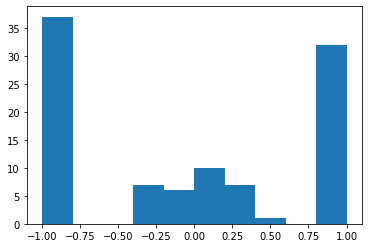

In [8]:
plt.hist(list_mag)
plt.show()

In [9]:
size = 20
list_mag3 = []
for i in range(10):
    sim = IsingSimulation(size, temperature=0) 
    for _ in range(100000):
        sim.update()
    list_mag3.append(sim.average_magnetism())

/Users/claudia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in double_scalars
/Users/claudia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/Users/claudia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in double_scalars


(array([1., 0., 1., 0., 1., 3., 2., 0., 1., 1.]),
 array([-0.305 , -0.2485, -0.192 , -0.1355, -0.079 , -0.0225,  0.034 ,
         0.0905,  0.147 ,  0.2035,  0.26  ]),
 <BarContainer object of 10 artists>)

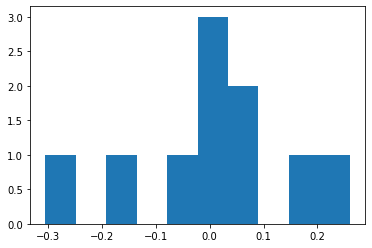

In [10]:
plt.hist(list_mag3)

In [11]:
size = 20
list_mag2 = []
t=2000
sim = IsingSimulation(size, temperature=t) 
for _ in range(100000):
    if _ % 100 == 0:
        t -= 100
        sim.set_temperature(t)
        sim.update()
        list_mag2.append(sim.average_magnetism())
    else:
        sim.update()


/Users/claudia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/Users/claudia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in double_scalars
/Users/claudia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in double_scalars


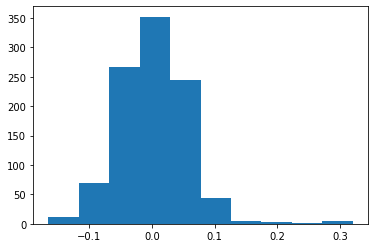

In [12]:
plt.hist(list_mag2)
plt.show()